In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
weight = 8
bias = 3.1
X = torch.arange(1,10,0.001).unsqueeze(dim=1)
y = (X * weight) + bias  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)
X_train.shape


2

In [12]:
def plot_predictions( train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    # plot training data in blue 
    plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
    # plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
    if predictions is not None:
        # plot predictions in red
        plt.scatter(test_data,predictions,c="r",s=4,label="prediction data")
    #show the legends
    plt.legend(prop={"size":14})  
    
    

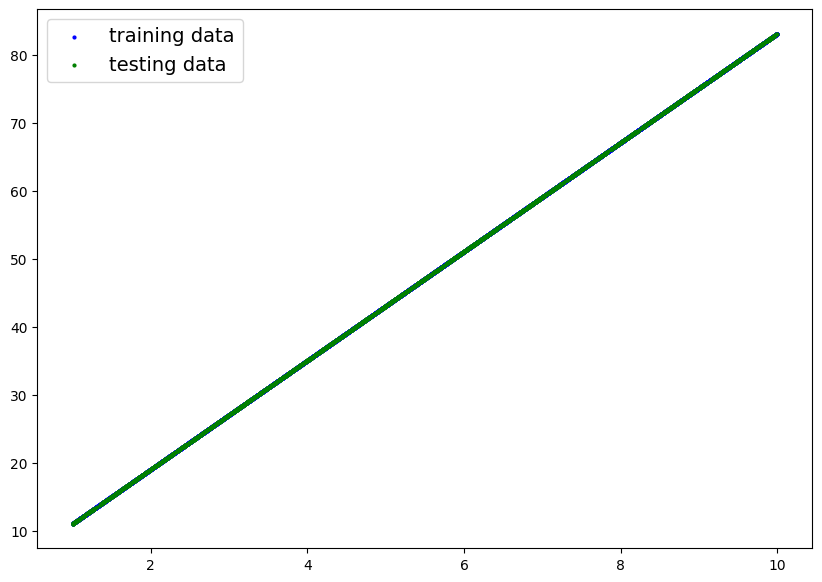

In [13]:
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test)

In [38]:
y_train.shape

torch.Size([7200, 1])

In [54]:
class regression_Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1,10),
            nn.Linear(10,10),
            nn.Linear(10,1)
        )

    def forward(self,x):
        return self.network(x)        

In [55]:
Model = regression_Model()
Loss_fcn = nn.L1Loss()
optimizer = optim.SGD(params=Model.parameters(),lr=0.01)

In [34]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,torch.round(y_pred)).sum().item()
    acc = (correct/len(y_pred)) * 100 
    return acc

In [27]:
a = Model(X_train[:10]) 

tensor([[6.5790],
        [7.2040],
        [2.0170],
        [3.1030],
        [5.7370],
        [9.9040],
        [1.6790],
        [5.6750],
        [7.9000],
        [3.9420]])

In [ ]:
epochs = 100

for epoch in range(epochs): 
    Model.train()

    # Make prediction
    pred = Model(X_train)
    
    # Calculate loss
    loss = Loss_fcn(pred,y_train) 
    
    # setup optimizer  
    optimizer.zero_grad() 
    
    # Backward propagation
    loss.backward()
    optimizer.step()
    
    Model.eval()
    with torch.inference_mode():
        test_pred = Model(X_test)
        test_loss = Loss_fcn(test_pred,y_test)
    print(f"Epoch : {epoch} | , Loss : {loss:.2f} |,  Test Loss:{test_loss:.2f}")
    #print(f"{test_pred[0]}---{y_test[0]}")   

In [ ]:
plot_predictions(predictions=test_pred)